In [26]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
import zipfile
import pandas as pd
import os

# Define paths
zip_path = "/content/chest_xray.zip"  # Uploaded ZIP file
extract_path = "/mnt/data/chest_xray"  # Extract location

# Extract the ZIP file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
files = os.listdir(extract_path)
print("Extracted Files:", files)

# Find CSV file
csv_files = [f for f in files if f.endswith(".csv")]
if csv_files:
    csv_path = os.path.join(extract_path, csv_files[0])

    # Load CSV into DataFrame
    df = pd.read_csv(csv_path)

    # Display first 5 rows
    print(df.head())



Extracted Files: ['chest_xray']


In [23]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5500 - loss: 0.6335 - val_accuracy: 0.4000 - val_loss: 0.7022
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5500 - loss: 0.7047 - val_accuracy: 0.4500 - val_loss: 0.7005
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6500 - loss: 0.6444 - val_accuracy: 0.5000 - val_loss: 0.6970
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6985 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5500 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.5999 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5500 - loss: 0.6551 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 9/10
1/1 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


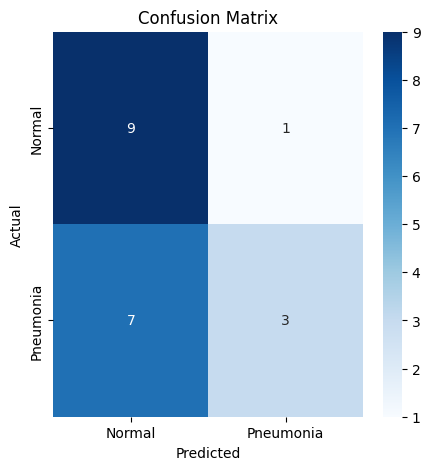

              precision    recall  f1-score   support

      Normal       0.56      0.90      0.69        10
   Pneumonia       0.75      0.30      0.43        10

    accuracy                           0.60        20
   macro avg       0.66      0.60      0.56        20
weighted avg       0.66      0.60      0.56        20



In [24]:
# Get true labels
y_true = test_generator.classes

# Predict the test data
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))


In [25]:
# Save the trained model
model.save("pneumonia_cnn_model.h5")

# Load the saved model
loaded_model = tf.keras.models.load_model("pneumonia_cnn_model.h5")


**CNN Model Architecture**

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Choose the image type: use 3 for RGB and 1 for grayscale
channels = 3  # change to 1 for grayscale images
IMG_HEIGHT, IMG_WIDTH = 150, 150

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

**RGB Images**

In [9]:
import numpy as np
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === Step 1: Define paths ===
zip_path = "/content/chest_xray.zip"  # Path to ZIP file
extract_path = "/content/chest_xray"  # Destination folder after extraction

# === Step 2: Extract ZIP file if not already extracted ===
if not os.path.exists(extract_path) or not os.listdir(extract_path):
    print("Extracting dataset...")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(" Extraction complete!")
    except Exception as e:
        raise RuntimeError(f" Error extracting ZIP file: {e}")

# === Step 3: Check extracted directory ===
# Auto-detect the correct subfolder (sometimes ZIP files extract into a nested folder)
expected_train_dir = os.path.join(extract_path, "train")
if not os.path.exists(expected_train_dir):
    # Try to find the train folder inside any subfolder
    for root, dirs, _ in os.walk(extract_path):
        if "train" in dirs:
            expected_train_dir = os.path.join(root, "train")
            break

if not os.path.exists(expected_train_dir):
    raise FileNotFoundError(f" 'train' directory not found in {extract_path}. Check the ZIP structure!")

print(f" Training data located at: {expected_train_dir}")

# === Step 4: Define Z-score normalization function ===
def zscore_normalization(image):
    """Applies Z-score normalization to an image."""
    mean = np.mean(image)
    std = np.std(image)
    std = std if std > 0 else 1e-6  # Avoid division by zero
    return (image - mean) / std

# === Step 5: Define preprocessing function ===
def preprocess_function(image):
    """Scales pixel values and applies Z-score normalization."""
    image = image.astype('float32') / 255.0
    return zscore_normalization(image)

# === Step 6: Define Image Data Generator ===
train_datagen_rgb = ImageDataGenerator(
    preprocessing_function=preprocess_function,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# === Step 7: Generate batches of images from the extracted directory ===
try:
    train_generator = train_datagen_rgb.flow_from_directory(
        expected_train_dir,
        target_size=(150, 150),  # Resize images
        batch_size=32,           # Batch size
        class_mode='binary',      # Binary classification (Normal vs Pneumonia)
        color_mode='rgb'         # Ensure images are loaded as RGB
    )
    print("Data generator successfully created!")
except Exception as e:
    raise RuntimeError(f" Error loading dataset: {e}")

# === Step 8: Print class indices ===
print("Class indices:", train_generator.class_indices)


 Training data located at: /content/chest_xray/chest_xray/train
Found 20 images belonging to 2 classes.
Data generator successfully created!
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


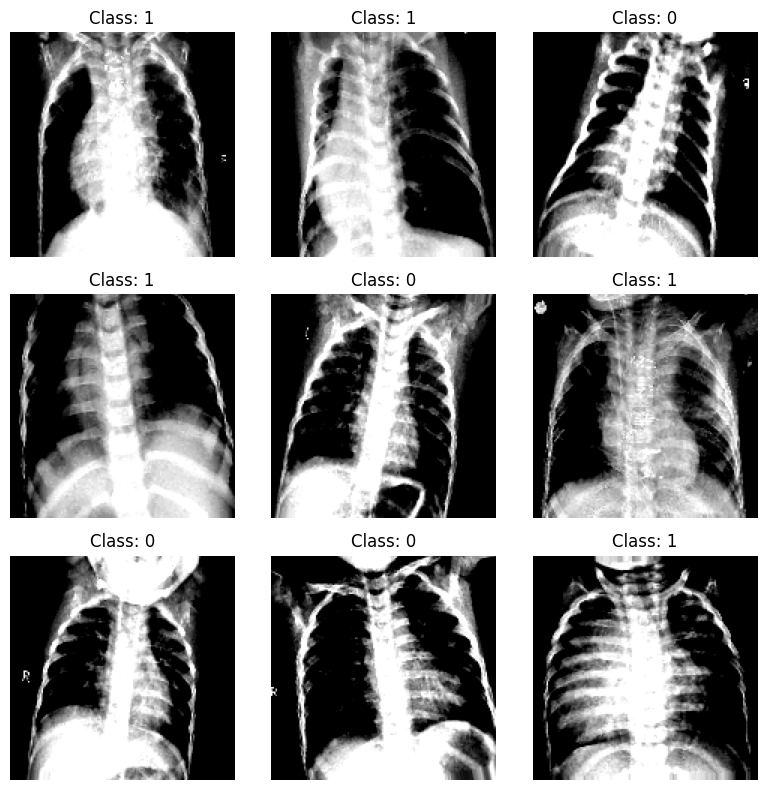

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)  # Get one batch of 32 images

# Define number of images to display
num_images = 9  # Display a 3x3 grid

# Create a figure
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # 3x3 grid

for i, ax in enumerate(axes.flat):
    if i >= num_images:
        break
    # Display the image
    ax.imshow(images[i])  # Since images are already normalized, no need for denormalization
    ax.axis('off')
    ax.set_title(f"Class: {int(labels[i])}")  # Display class (0 or 1)

# Show the images
plt.tight_layout()
plt.show()


** Display Images with Pneumonia/Normal Labels**

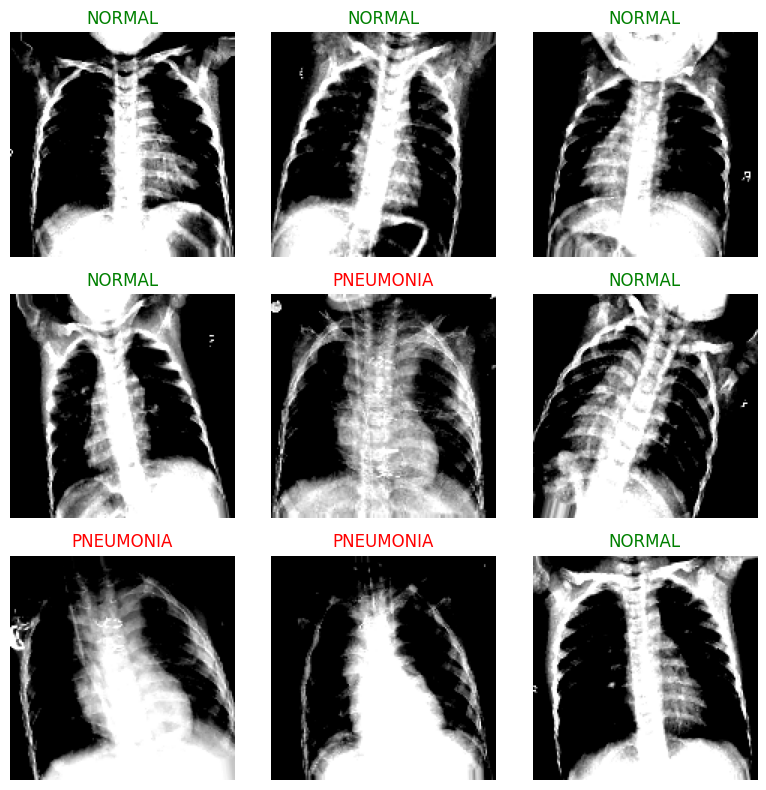

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#  Get class labels mapping
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse mapping

#  Get a batch of images and labels
images, labels = next(train_generator)  # Get one batch of 32 images

#  Define number of images to display
num_images = 9  # Display a 3x3 grid

#  Create a figure
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # 3x3 grid

for i, ax in enumerate(axes.flat):
    if i >= num_images:
        break
    #  Display the image
    ax.imshow(images[i])
    ax.axis('off')

    #Get class label (0 -> Normal, 1 -> Pneumonia)
    label = int(labels[i])
    class_name = class_labels[label]  # Get class name from mapping
    ax.set_title(f"{class_name}", color="red" if class_name == "PNEUMONIA" else "green")

# Show the images
plt.tight_layout()
plt.show()


**RGB to Grayscale Conversion**

In [16]:
import cv2
import numpy as np

def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    # Check if the image was loaded successfully
    if image is None:
        raise ValueError(f"Could not load image at path: {image_path}")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

if __name__ == "__main__":
    # Update the image path to the correct location
    # Ensure the image 'IM-0156-0001.jpeg' exists in this directory
    image_path = '/content/chest_xray/chest_xray/train/NORMAL/IM-0147-0001.jpeg'
    gray = convert_to_grayscale(image_path)
    output_path = '/content/chest_xray/chest_xray/train/PNEUMONIA/person3_bacteria_11.jpeg'
    cv2.imwrite(output_path, gray)

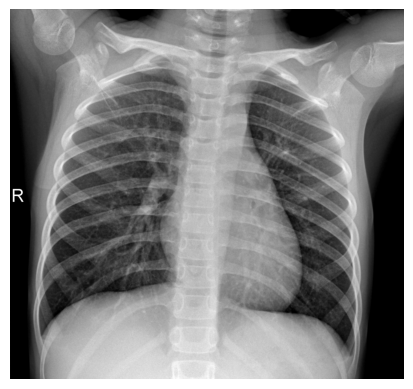

In [17]:
# prompt: display these jpeg

import matplotlib.pyplot as plt
import cv2

# Assuming you have the image path
image_path = '/content/chest_xray/chest_xray/train/NORMAL/IM-0147-0001.jpeg'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image at path: {image_path}")
else:
    # Convert the image to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()


**Z-Score**

In [18]:
import numpy as np

def z_score_normalization(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

if __name__ == "__main__":
    sample_data = np.array([10, 20, 30, 40, 50])
    normalized_data = z_score_normalization(sample_data)
    print("Z-Score Normalized Data:", normalized_data)


Z-Score Normalized Data: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


**Z-Scale **

In [19]:
import numpy as np

def z_scale_normalization(data, new_min=0, new_max=1):
    old_min, old_max = np.min(data), np.max(data)
    return new_min + ((data - old_min) * (new_max - new_min) / (old_max - old_min))

if __name__ == "__main__":
    sample_data = np.array([10, 20, 30, 40, 50])
    scaled_data = z_scale_normalization(sample_data)
    print("Z-Scale Normalized Data:", scaled_data)


Z-Scale Normalized Data: [0.   0.25 0.5  0.75 1.  ]


**Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

def compute_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

if __name__ == "__main__":
    y_true = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0])
    y_pred = np.array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0])
    cm = compute_confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[4 1]
 [1 4]]


Found 20 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6000 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.6995
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6877 - val_accuracy: 0.5000 - val_loss: 0.7013
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4500 - loss: 0.7196 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6000 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6852 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6000 - loss: 0.6772 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6853 - val_accuracy: 0.5000 - val_loss: 0.6896
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 0.6644 - val_accuracy: 0.5625 - val_loss: 0.6893
Epoch 9/10
1/1 ━

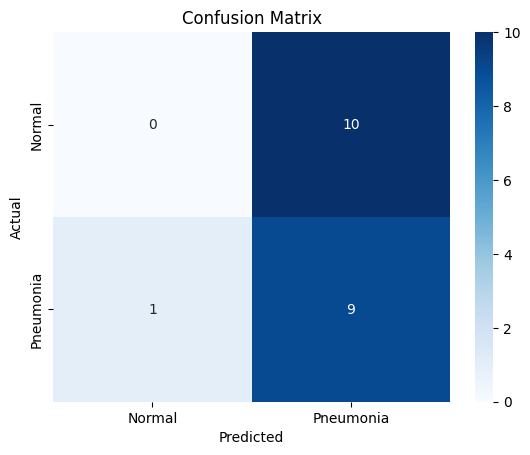

In [21]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Extract ZIP file
dataset_zip = "/content/chest_xray.zip"  # Update this with the actual path
extract_path = "/content/"
with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

dataset_path = os.path.join(extract_path, "chest_xray")
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')
test_dir = os.path.join(dataset_path, 'test')

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=False)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    train_generator, epochs=10,
    validation_data=val_generator)

# Evaluate Model
y_pred = (model.predict(test_generator) > 0.5).astype('int')
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Function to Predict Pneumonia from New X-ray Image
def predict_pneumonia(image_path, model):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return "Pneumonia" if prediction > 0.5 else "Normal"

# Example Usage
# print(predict_pneumonia("/path/to/image.jpg", model))

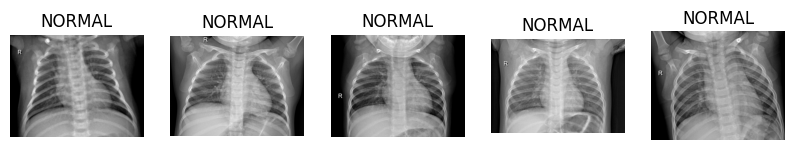

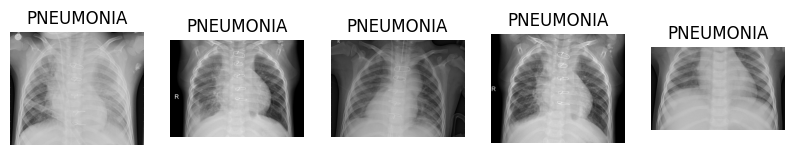

In [22]:
import os
import matplotlib.pyplot as plt

# Function to display sample images from the dataset
def display_sample_images(directory, category, num_images=5):
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)[:num_images]
    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(category_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')
    plt.show()

# Set dataset paths
dataset_path = "/content/chest_xray"  # Update the path accordingly
train_dir = os.path.join(dataset_path, 'train')

# Display sample images from Normal and Pneumonia categories
display_sample_images(train_dir, 'NORMAL')
display_sample_images(train_dir, 'PNEUMONIA')
